In [53]:
#Importing all libraries
#Libraries: numpy, pandas, matplotlib, collections, sklearn
import numpy as np
import pandas as pd
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from collections import Counter
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline  

In [54]:
#Reading data using pandas library
database = pd.read_csv('spam.csv', encoding='latin-1')
database.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [55]:
#removing Unnamed columns 2,3,4
database = database.drop('Unnamed: 2', 1)
database = database.drop('Unnamed: 3', 1)
database = database.drop('Unnamed: 4', 1)
database.head(n=10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [56]:
database.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

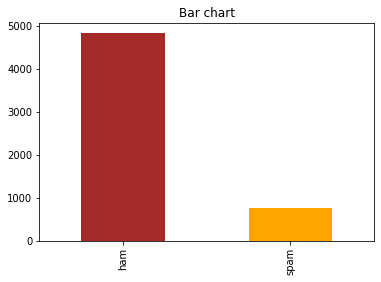

In [57]:
#Bar chart represtation of dataset
chart=pd.value_counts(database["v1"], sort= True)
chart.plot(kind= 'bar', color= ["brown", "orange"])
plt.title('Bar chart')
plt.show()

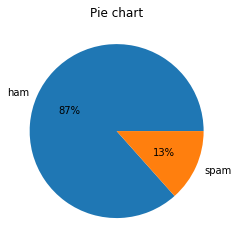

In [58]:
#Pie chart represtation of dataset
chart.plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [61]:
#Counter function to split most common words in ham messages
count_ham = Counter(" ".join(database[database['v1']=='ham']["v2"]).split()).most_common(20)
dataFrame_ham = pd.DataFrame.from_dict(count_ham)
dataFrame_ham = dataFrame_ham.rename(columns={0: "words in ham", 1 : "count"})

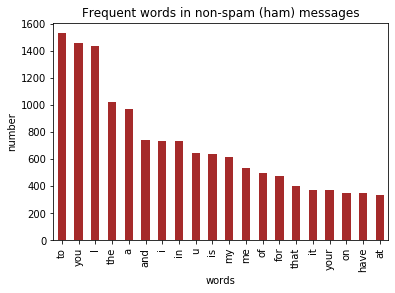

In [62]:
dataFrame_ham.plot.bar(legend = False, color = 'brown')
y_pos = np.arange(len(dataFrame_ham["words in ham"]))
plt.xticks(y_pos, dataFrame_ham["words in ham"])
plt.title('Frequent words in non-spam (ham) messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [64]:
count_spam = Counter(" ".join(database[database['v1']=='spam']["v2"]).split()).most_common(20)
dataFrame_spam = pd.DataFrame.from_dict(count_spam)
dataFrame_spam = dataFrame_spam.rename(columns={0: "words in spam", 1 : "count_"})

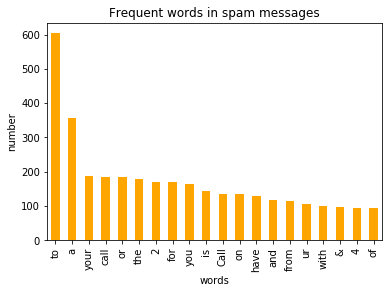

In [65]:
dataFrame_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(dataFrame_spam["words in spam"]))
plt.xticks(y_pos, dataFrame_spam["words in spam"])
plt.title('Frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [66]:
#Feature Extraction using CounterVectorizer
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(database["v2"])
np.shape(X)

(5572, 8404)

In [67]:
#Classify spam and ham messages by 1 and 0 respectively
database["v1"]=database["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, database['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


In [79]:
# Multinomial Naïve Bayes algorithm
#assign different values to alpha variable to check the performance
alpha_list = np.arange(1/100000, 20, 0.11)
train_score = np.zeros(len(alpha_list))
test_score = np.zeros(len(alpha_list))
test_recall = np.zeros(len(alpha_list))
test_precision= np.zeros(len(alpha_list))
count = 0
for alpha in alpa_list:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    train_score[count] = bayes.score(X_train, y_train)
    test_score[count]= bayes.score(X_test, y_test)
    test_recall[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    test_precision[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [80]:
# Show the table with different values of alpha
matrix = np.matrix(np.c_[alpa_list, train_score, test_score, test_recall, test_precision])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998661,0.974443,0.920635,0.895753
1,0.11001,0.997857,0.976074,0.936508,0.893939
2,0.22001,0.997857,0.977162,0.936508,0.900763
3,0.33001,0.997589,0.977162,0.936508,0.900763
4,0.44001,0.997053,0.977162,0.936508,0.900763
5,0.55001,0.996250,0.976618,0.936508,0.897338
6,0.66001,0.996518,0.976074,0.932540,0.896947
7,0.77001,0.996518,0.976074,0.924603,0.903101
8,0.88001,0.996250,0.976074,0.924603,0.903101
9,0.99001,0.995982,0.976074,0.920635,0.906250


In [81]:
# Check performance
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [82]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
143,15.73001,0.979641,0.969549,0.777778,1.0
144,15.84001,0.979641,0.969549,0.777778,1.0
145,15.95001,0.979641,0.969549,0.777778,1.0
146,16.06001,0.979373,0.969549,0.777778,1.0
147,16.17001,0.979373,0.969549,0.777778,1.0


In [83]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=alpha_list[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [84]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


In [85]:
# Support Vector Machine algorithm
# Check performance using different values of C
C_list = np.arange(500, 2000, 100) #100000
train_score = np.zeros(len(list_C))
test_score = np.zeros(len(list_C))
test_recall = np.zeros(len(list_C))
test_precision= np.zeros(len(list_C))
count = 0
for C in C_list:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    train_score[count] = svc.score(X_train, y_train)
    test_score[count]= svc.score(X_test, y_test)
    test_recall[count] = metrics.recall_score(y_test, svc.predict(X_test))
    test_precision[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1

In [86]:
matrix = np.matrix(np.c_[C_list, train_score, test_score, test_recall, test_precision])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.979337,0.853175,0.99537
1,600.0,1.0,0.979337,0.853175,0.99537
2,700.0,1.0,0.979337,0.853175,0.99537
3,800.0,1.0,0.979337,0.853175,0.99537
4,900.0,1.0,0.979337,0.853175,0.99537
5,1000.0,1.0,0.979337,0.853175,0.99537
6,1100.0,1.0,0.979337,0.853175,0.99537
7,1200.0,1.0,0.979337,0.853175,0.99537
8,1300.0,1.0,0.979337,0.853175,0.99537
9,1400.0,1.0,0.979337,0.853175,0.99537


In [87]:
# Check performance
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.979337
Test Recall         0.853175
Test Precision      0.995370
Name: 0, dtype: float64

In [88]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1586,1
Actual 1,37,215


In [89]:
#Random Forest algorithm
random_forest = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
randomForest_model = random_forest.fit(X_train,y_train)

In [90]:
y_pred=randomForest_model.predict(X_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.995 / Recall : 0.837 / fscore : 0.909 / Accuracy: 0.977
